In [33]:
import pandas as pd
from nltk.tokenize import word_tokenize
from gensim.models import FastText

https://medium.com/@93Kryptonian/word-embedding-using-fasttext-62beb0209db9

## Read files

In [34]:
import os

path = "..//data//external//cadec//text"
files_list = os.listdir(path)
print(files_list)

['ARTHROTEC.1.txt', 'ARTHROTEC.10.txt', 'ARTHROTEC.100.txt', 'ARTHROTEC.101.txt', 'ARTHROTEC.102.txt', 'ARTHROTEC.103.txt', 'ARTHROTEC.104.txt', 'ARTHROTEC.105.txt', 'ARTHROTEC.106.txt', 'ARTHROTEC.107.txt', 'ARTHROTEC.108.txt', 'ARTHROTEC.109.txt', 'ARTHROTEC.11.txt', 'ARTHROTEC.110.txt', 'ARTHROTEC.111.txt', 'ARTHROTEC.112.txt', 'ARTHROTEC.113.txt', 'ARTHROTEC.114.txt', 'ARTHROTEC.115.txt', 'ARTHROTEC.116.txt', 'ARTHROTEC.117.txt', 'ARTHROTEC.118.txt', 'ARTHROTEC.119.txt', 'ARTHROTEC.12.txt', 'ARTHROTEC.120.txt', 'ARTHROTEC.121.txt', 'ARTHROTEC.122.txt', 'ARTHROTEC.123.txt', 'ARTHROTEC.124.txt', 'ARTHROTEC.125.txt', 'ARTHROTEC.126.txt', 'ARTHROTEC.127.txt', 'ARTHROTEC.128.txt', 'ARTHROTEC.129.txt', 'ARTHROTEC.13.txt', 'ARTHROTEC.130.txt', 'ARTHROTEC.131.txt', 'ARTHROTEC.132.txt', 'ARTHROTEC.133.txt', 'ARTHROTEC.134.txt', 'ARTHROTEC.135.txt', 'ARTHROTEC.136.txt', 'ARTHROTEC.137.txt', 'ARTHROTEC.138.txt', 'ARTHROTEC.139.txt', 'ARTHROTEC.14.txt', 'ARTHROTEC.140.txt', 'ARTHROTEC.141.txt'

In [35]:
corpus = []

for file_name in files_list:
    f = open(f'{path}//{file_name}')
    corpus.append(f.read())

corpus_df = pd.DataFrame(corpus)
corpus_df.columns = ['Txt']
corpus_df.head()

,Txt
0,I feel a bit drowsy & have a little blurred vi...
1,"Hunger pangs.\nBrilliant, I have a new lease o..."
2,no side effects for the first two months .\nth...
3,"1st pill taken with food, a few hours after i ..."
4,I have had no side effects been taking Arthrot...


In [36]:
docs =  [word_tokenize(txt.lower()) for txt in corpus_df.Txt]

docs

[['i',
  'feel',
  'a',
  'bit',
  'drowsy',
  '&',
  'have',
  'a',
  'little',
  'blurred',
  'vision',
  ',',
  'so',
  'far',
  'no',
  'gastric',
  'problems',
  '.',
  'i',
  "'ve",
  'been',
  'on',
  'arthrotec',
  '50',
  'for',
  'over',
  '10',
  'years',
  'on',
  'and',
  'off',
  ',',
  'only',
  'taking',
  'it',
  'when',
  'i',
  'needed',
  'it',
  '.',
  'due',
  'to',
  'my',
  'arthritis',
  'getting',
  'progressively',
  'worse',
  ',',
  'to',
  'the',
  'point',
  'where',
  'i',
  'am',
  'in',
  'tears',
  'with',
  'the',
  'agony',
  ',',
  'gp',
  "'s",
  'started',
  'me',
  'on',
  '75',
  'twice',
  'a',
  'day',
  'and',
  'i',
  'have',
  'to',
  'take',
  'it',
  '.',
  'every',
  'day',
  'for',
  'the',
  'next',
  'month',
  'to',
  'see',
  'how',
  'i',
  'get',
  'on',
  ',',
  'here',
  'goes',
  '.',
  'so',
  'far',
  'its',
  'been',
  'very',
  'good',
  ',',
  'pains',
  'almost',
  'gone',
  ',',
  'but',
  'i',
  'feel',
  'a',
  'bit',

## Train the model

In [37]:
model = FastText(docs, 
                 vector_size=128, 
                 window=7, 
                 min_count = 3,
                 workers = 3,
                 sg=1, #sg=0: CBOW, sg=1: skipgram
                 epochs=10,
                 seed=379,
                 )

In [38]:
#model.save('..//models//cadec_corpus_01.ft')

## Examine the model

In [39]:
ftext = model.wv
print(len(ftext.index_to_key))
print(ftext.vector_size)

2510
128


In [40]:
ftext["knee"]

array([ 0.00178066, -0.10400593,  0.01954235, -0.16916825,  0.2532591 ,
        0.0011163 ,  0.0418455 , -0.00591487,  0.2860401 , -0.11412499,
        0.06251467,  0.03388746, -0.05772241, -0.09988031,  0.20146999,
        0.13422374,  0.13820094,  0.07218807,  0.08758379,  0.18220156,
       -0.41603118,  0.1049686 ,  0.03202663,  0.23316956, -0.03364212,
       -0.2129149 ,  0.43282822, -0.2077765 , -0.29537708,  0.06961765,
       -0.06314378, -0.37888497, -0.31259337, -0.25307924,  0.2746269 ,
       -0.13695525, -0.08396065, -0.1933623 ,  0.08756521,  0.37427577,
       -0.04973738, -0.10080778, -0.1005877 ,  0.22250305,  0.04136567,
        0.17312413,  0.2394534 , -0.20295516,  0.24748464,  0.28987014,
       -0.12386692,  0.14946605,  0.01674867,  0.32130802, -0.18577537,
       -0.49899772,  0.05830699, -0.41030982, -0.30470377, -0.37468928,
        0.14411198, -0.08561467, -0.15063173, -0.4860874 , -0.33012995,
       -0.0175611 ,  0.22424978, -0.38147613, -0.3980327 ,  0.12

In [41]:
ftext.similar_by_word("knee", topn=10)

[('elbow', 0.8926613926887512),
 ('hip', 0.8778359889984131),
 ('knees', 0.872818648815155),
 ('elbows', 0.8699309229850769),
 ('ankle', 0.8524752855300903),
 ('hips', 0.8309099078178406),
 ('shoulder', 0.8308065533638),
 ('spine', 0.8250280618667603),
 ('foot', 0.8244863748550415),
 ('left', 0.8240841627120972)]

## Import Docs_similarity class

In [42]:
# %run -i docs_similarity.ipynb
# import numpy as np

import nltk
nltk.download('punkt') #https://www.nltk.org/data.html

import numpy as np
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt

def cosine(v1, v2):
    v1, v2 = np.array(v1), np.array(v2)
    return np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))
    
def document_to_avg_embedding(doc, embeddings):
    
    doc_embeddings = []
    doc = str.lower(doc)
    tokens = word_tokenize(doc)

    for token in tokens:

        try:
            if token in embeddings.keys():
                doc_embeddings.append(embeddings[token])
        except AttributeError as e:
            if token in embeddings.key_to_index.keys():
                doc_embeddings.append(embeddings[token])
    
    avg_embedding = np.mean(np.array(doc_embeddings), axis=0)

    return avg_embedding
        
def cosine_sim_between_docs(doc1, doc2, embeddings, verbose=False):

    v1 = document_to_avg_embedding(doc1, embeddings)
    v2 = document_to_avg_embedding(doc2, embeddings)

    # If there is no embedings for a doc, return 0.0 (a != a returns true for NaNs).
    try: any(v1 != v1)
    except TypeError:
        if verbose: print(f'Warning cannot find embedding for {doc1}.')
        return 0.0
    
    try: any(v2 != v2)
    except TypeError:
        if verbose: print(f'Warning cannot find embedding for {doc2}.')
        return 0.0
    
    cosine_sim = cosine(v1, v2)


    if verbose:
        print(f'Cosine similarity between {doc1} and {doc2} is:\n{cosine_sim}\n')

    return cosine_sim
    
def calculate_similarity_matrix(cadec_sample, mapping):
    similarity_matrix = np.zeros((5,5))
    count_matrix = np.zeros((5,5))

    for index_i, row_i in cadec_sample.iterrows():
        for index_j, row_j in cadec_sample.iterrows():
            
            # Do not calculate simmilarities for the same entities
            # to not overestimate the score within the same group.
            if index_i != index_j:
                similarity_matrix[row_i.entity_type][row_j.entity_type] += cosine_sim_between_docs(row_i.text, row_j.text, mapping, verbose=False)
                count_matrix[row_i.entity_type][row_j.entity_type] += 1

    similarity_matrix /= count_matrix
    return similarity_matrix
    
def plot_similarity_matrix(similarity_matrix):
    
    plt.imshow(similarity_matrix, vmin=-1, vmax=1, extent=[0, 5, 0, 5]) 
    for i in range(5): 
        for j in range(5): 
            plt.annotate(str(round(similarity_matrix[i][j], 3)),
                        xy=(j+0.5, i+0.7), 
                        ha='center', va='center', color='white') 
            
    plt.show()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Load data

In [43]:
path = "..//data//external//cadec//original"
dir_list = os.listdir(path)
len(dir_list)

1250

In [44]:
cadec_df = pd.concat((pd.read_csv(f'{path}//{f}', sep='\t', names=['tag_number', 'entity_type_offsets', 'text']) for f in dir_list), ignore_index=True)
cadec_df.entity_type_offsets = cadec_df.entity_type_offsets.str.split().str.get(0)      # Extract entity types from entity_type_offsets
cadec_df = cadec_df.rename(columns={"entity_type_offsets": "entity_type"})              # Rename column
cadec_df = cadec_df[ -cadec_df.tag_number.str.startswith('#')]                          # Remove annotation notes
cadec_df = cadec_df[['entity_type', 'text']]                                            # Leave only 'entity_type' and 'text' columns
cadec_df = cadec_df.reset_index(drop=True)                                              # Reset index
cadec_df

,entity_type,text
0,ADR,bit drowsy
1,ADR,little blurred vision
2,Drug,Arthrotec
3,Disease,arthritis
4,Symptom,agony
...,...,...
9106,Symptom,Lupus pain
9107,Symptom,pain from the herniated discs
9108,Finding,disc issues
9109,Drug,Zipsor


## Train Test Validation split

In [45]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(cadec_df, test_size=0.2, random_state=379, shuffle=True,)
train, val = train_test_split(train, test_size=0.2, random_state=379, shuffle=True,)

print(len(train))
print(len(test))
print(len(val))

5830
1823
1458


In [46]:
# corpus = []

# for file_name in files_list:
#     f = open(f'{path}//{file_name}')
#     corpus.append(f.read())

# corpus_df = pd.DataFrame(corpus)
# corpus_df.columns = ['Txt']
# corpus_df.head()
# docs =  [word_tokenize(txt.lower()) for txt in corpus_df.Txt]

train = [word_tokenize(txt.lower()) for txt in corpus_df.head(100).Txt]

In [47]:
print(val.head())
val.entity_type.value_counts()

     entity_type                        text
7981         ADR   Sores on the inner cheeks
3221        Drug                     lipitor
4064         ADR  feeling tired all the time
9098        Drug                       mobic
481      Symptom                        pain


entity_type
ADR        994
Drug       306
Finding     75
Disease     44
Symptom     39
Name: count, dtype: int64

In [48]:
type_dict = {'ADR':0, 'Disease':1, 'Drug':2, 'Finding':3, 'Symptom':4}
val.entity_type = val.entity_type.map(type_dict)
val.head()

,entity_type,text
7981,0,Sores on the inner cheeks
3221,2,lipitor
4064,0,feeling tired all the time
9098,2,mobic
481,4,pain


## Similarity matrix matric

In [49]:
similarity_matrix=[
    [0.65326867, 0.50436608, 0.54396547, 0.60149205, 0.68317299],
    [0.50436608, 0.49722514, 0.5039656,  0.51631858, 0.48195767],
    [0.54396547, 0.5039656,  0.67149904, 0.49680017, 0.54134704],
    [0.60149205, 0.51631858, 0.49680017, 0.55389526, 0.55522851],
    [0.68317299, 0.48195767, 0.54134704, 0.55522851, 0.71551195]
]

def similarity_matrix_metrics(similarity_matrix):
    sim_len = len(similarity_matrix)
    score = 0 #count difference between similarities
    count = 0 #count number of similarities that are less or equal to similaraity within the same class
    for i in range(sim_len):
        for j in range(sim_len):

            score += similarity_matrix[i][i] - similarity_matrix[i][j]
            if similarity_matrix[i][i]-similarity_matrix[i][j] >= 0:
                count += 1

    return score, count

similarity_matrix_metrics(similarity_matrix)


(1.5083719200000005, 19)

## Grid search

In [60]:
params = {
    "vector_size": [64],
    "window": [3, 5, 7],
    "min_count": [3],
    "sg": [0]
}

In [61]:
for vector_size in params["vector_size"]:
    for window in params["window"]:
        for min_count in params["min_count"]:
            for sg in params["sg"]:
                
                model = FastText(train, 
                 vector_size=vector_size, 
                 window=window, 
                 min_count = min_count,
                 workers = 3,
                 sg=sg, #sg=0: CBOW, sg=1: skipgram
                 epochs=10,
                 seed=379,
                 )
                
                ft_mapping = model.wv

                similarity_matrix = calculate_similarity_matrix(val.head(100), ft_mapping)
                score, count = similarity_matrix_metrics(similarity_matrix)

                print(f'{vector_size}_{window}_{min_count}_{sg}:\t{score:.4f}\t{count}')
                
                # model.save(f'..//models//cadec_corpus_01_{vector_size}_{window}_{min_count}_{sg}.ft')


64_3_3_0:	2.1596	19
64_5_3_0:	2.1596	19
64_7_3_0:	2.1596	19


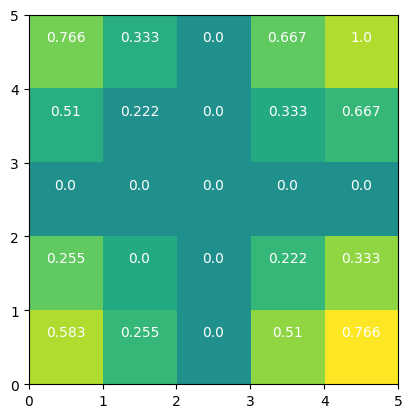

In [62]:
plot_similarity_matrix(similarity_matrix)